In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, confusion_matrix

In [2]:
data_preprocessed = pd.read_csv('BW_bookings_21-current.csv', index_col=0)
data_preprocessed

,month_of_booking,day_of_booking,weekday_of_booking,month_of_arrival,day_of_arrival,weekday_of_arrival,num_of_nights,is_repeated_guest,previous_stays,previous_cancellations,booking_to_arrival_duration,Rate,Override,is_canceled
21550,1,26,1,6,9,3,4,0,0,0,44,97.01,97.01,0
32408,2,21,2,2,4,5,1,0,0,0,45,279.00,279.00,0
21486,0,6,0,6,7,1,1,0,0,0,1,90.40,90.40,0
11061,2,5,2,11,3,3,2,0,0,0,29,139.00,139.00,0
7958,0,27,0,1,13,3,3,0,0,0,17,179.00,179.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30189,4,3,4,11,11,5,1,1,0,0,8,169.00,169.00,1
30190,1,7,1,11,11,5,1,1,0,0,4,169.00,169.00,0
7890,0,13,0,1,12,2,1,0,0,0,30,97.30,100.43,0
1533,0,1,0,11,1,0,2,1,0,0,0,108.90,0.00,0


### Create the targets

In [3]:
data = data_preprocessed.copy()

targets = data.is_canceled

In [4]:
data

,month_of_booking,day_of_booking,weekday_of_booking,month_of_arrival,day_of_arrival,weekday_of_arrival,num_of_nights,is_repeated_guest,previous_stays,previous_cancellations,booking_to_arrival_duration,Rate,Override,is_canceled
21550,1,26,1,6,9,3,4,0,0,0,44,97.01,97.01,0
32408,2,21,2,2,4,5,1,0,0,0,45,279.00,279.00,0
21486,0,6,0,6,7,1,1,0,0,0,1,90.40,90.40,0
11061,2,5,2,11,3,3,2,0,0,0,29,139.00,139.00,0
7958,0,27,0,1,13,3,3,0,0,0,17,179.00,179.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30189,4,3,4,11,11,5,1,1,0,0,8,169.00,169.00,1
30190,1,7,1,11,11,5,1,1,0,0,4,169.00,169.00,0
7890,0,13,0,1,12,2,1,0,0,0,30,97.30,100.43,0
1533,0,1,0,11,1,0,2,1,0,0,0,108.90,0.00,0


### Create the inputs

In [5]:
unscaled_inputs = data.drop(columns='is_canceled')
unscaled_inputs

,month_of_booking,day_of_booking,weekday_of_booking,month_of_arrival,day_of_arrival,weekday_of_arrival,num_of_nights,is_repeated_guest,previous_stays,previous_cancellations,booking_to_arrival_duration,Rate,Override
21550,1,26,1,6,9,3,4,0,0,0,44,97.01,97.01
32408,2,21,2,2,4,5,1,0,0,0,45,279.00,279.00
21486,0,6,0,6,7,1,1,0,0,0,1,90.40,90.40
11061,2,5,2,11,3,3,2,0,0,0,29,139.00,139.00
7958,0,27,0,1,13,3,3,0,0,0,17,179.00,179.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30189,4,3,4,11,11,5,1,1,0,0,8,169.00,169.00
30190,1,7,1,11,11,5,1,1,0,0,4,169.00,169.00
7890,0,13,0,1,12,2,1,0,0,0,30,97.30,100.43
1533,0,1,0,11,1,0,2,1,0,0,0,108.90,0.00


#### I'm going to train the model on unscaled data first since there is not a vast difference in the scale of the numerical units. I don't think scaling this data would be of much benefit. Though I will find out for sure later.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(unscaled_inputs, targets, train_size=0.9, random_state=10)

In [8]:
# We are training this model on 341 observations, by 11 columns.
print(x_train.shape, y_train.shape)

(46528, 13) (46528,)


In [9]:
# We are testing this model on 38
print(x_test.shape, y_test.shape)

(5170, 13) (5170,)


### Logistic Regression with sklearn

In [11]:
# Instantiate model object
reg = LogisticRegression()

In [12]:
# Fit data to model
reg.fit(x_train, y_train)

C:\Users\deonp\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
# Test the model
r_squared = reg.score(x_train, y_train)
r_squared

0.8506275790921596

In [14]:

y_true = y_train   # True labels
y_pred = reg.predict(x_train)  # Predicted label

In [15]:
# Calculate precision
f1 = f1_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
# Print or display the results
print("F1-score:", f1)
print("Precision:", precision)
print("R^2: ", r_squared)

F1-score: 0.6967978361399528
Precision: 0.9112277498858968
R^2:  0.8506275790921596


It seems like the model is performing quite well overall. Here's an interpretation of each metric:

**F1-score:**
The F1-score is a harmonic mean of precision and recall, providing a balance between them. A value close to 1 indicates high precision and recall, while a value closer to 0 indicates poor performance. The F1-score of approximately 0.70 suggests that the model achieves a good balance between precision and recall.

**Precision:**
Precision measures the proportion of true positive predictions among all positive predictions made by the model. A precision of 0.91 indicates that when the model predicts a reservation to be canceled, it is correct approximately 91% of the time. This high precision suggests that the model makes relatively few false positive predictions.

**R^2 score:**
The R^2 score (coefficient of determination) measures the proportion of the variance in the target variable that is predictable from the features. A value of 0.85 indicates that the model explains approximately 85% of the variance in the target variable, which is quite high.

Based on these metrics, it seems like the model is performing well in predicting whether a booked hotel reservation will be canceled or not. However, it's essential to consider the context of our problem and any specific requirements or constraints to determine if the model's performance meets our expectations. Additionally, I may want to further evaluate the model's performance using other metrics and techniques, such as cross-validation or examining the confusion matrix.


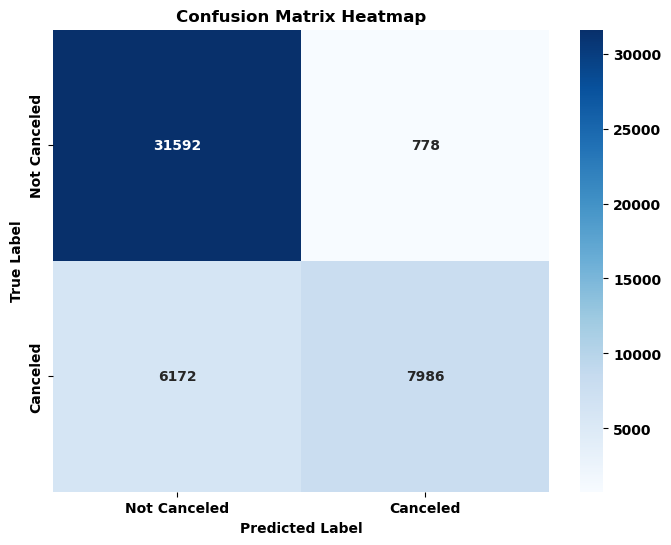

In [16]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", 
            xticklabels=["Not Canceled", "Canceled"], 
            yticklabels=["Not Canceled", "Canceled"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


## Confusion Matrix Heatmap Summary

- **Classification Labels**: Binary classification into "Not Canceled" and "Canceled".
- **Axes**:
  - **True Labels (Y-axis)**: Actual classification
  - **Predicted Labels (X-axis)**: Model's predictions

- **Matrix Values**:
  - **True Positive (Not Canceled)**: 31,592 (model correctly predicted "Not Canceled")
  - **False Positive (Canceled)**: 778 (model incorrectly predicted "Canceled" for actual "Not Canceled" cases)
  - **False Negative (Not Canceled)**: 6,172 (model incorrectly predicted "Not Canceled" for actual "Canceled" cases)
  - **True Positive (Canceled)**: 7,986 (model correctly predicted "Canceled")

- **Color Intensity**:
  - Indicates frequency of outcomes; darker colors represent higher numbers.

- **Performance Insights**:
  - High accuracy in predicting "Not Canceled" with significant true positives.
  - Challenges in predicting "Canceled" effectively, indicated by a considerable number of false negatives, suggesting a need to improve model sensitivity for "Canceled" predictions.


### Test Note:
#### When training on a dataset with nearly 15X more observations it offered a rather insignificant improvement of  2% to the models accuracy. Nonetheless, it did improve the model.

In [17]:
# View coeficients of the features
reg.coef_

array([[-2.51457502e-02, -9.53012728e-03, -2.51457502e-02,
        -5.92756176e-02, -1.18825516e-02, -2.01635923e-02,
         6.38197366e-02,  1.05777955e+00, -5.18799849e+00,
         7.94742593e+00,  9.60442941e-03, -4.52961719e-03,
         2.28518835e-03]])

In [18]:
# Create coefficients matrix dataframe
coef_matrix_features = unscaled_inputs.columns.values


coef_matrix = pd.DataFrame()

coef_matrix['Feature'] = coef_matrix_features
coef_matrix['Coefficient']= np.transpose(reg.coef_)

In [19]:
# insert intercept into the table
coef_matrix.index = coef_matrix.index + 1
coef_matrix.loc[0] = ['Intercept', reg.intercept_[0]]
coef_matrix = coef_matrix.sort_index()
# insert odds ratios 
coef_matrix['Odds Ratio'] = np.exp(coef_matrix['Coefficient'])
coef_matrix

,Feature,Coefficient,Odds Ratio
0,Intercept,-0.718763,0.487355
1,month_of_booking,-0.025146,0.975168
2,day_of_booking,-0.009530,0.990515
3,weekday_of_booking,-0.025146,0.975168
4,month_of_arrival,-0.059276,0.942447
5,day_of_arrival,-0.011883,0.988188
6,weekday_of_arrival,-0.020164,0.980038
7,num_of_nights,0.063820,1.065900
8,is_repeated_guest,1.057780,2.879969
9,previous_stays,-5.187998,0.005583


## Logistic Regression Coefficients Summary

This table provides an overview of the logistic regression model's coefficients and their corresponding odds ratios, which describe the effect of each feature on the likelihood of the target event (e.g., a booking cancellation).

- **Intercept**: The baseline log-odds of a cancellation occurring when all other features are zero is -0.718763, with an odds ratio of 0.487355, indicating less than even odds.
- **Time Variables**:
  - **Month of Booking**: Each increase by one month decreases the log-odds of cancellation by -0.025146 (Odds Ratio: 0.975168).
  - **Day of Booking**: Each day increase lowers the cancellation log-odds slightly by -0.009530 (Odds Ratio: 0.990515).
  - **Weekday of Booking**: Coefficient of -0.025146 with an Odds Ratio of 0.975168.
  - **Month of Arrival**: More negative impact with a coefficient of -0.059276 (Odds Ratio: 0.942447).
  - **Day of Arrival**: Decreases the log-odds by -0.011883 per day (Odds Ratio: 0.988188).
  - **Weekday of Arrival**: Each weekday increase decreases the log-odds by -0.020164 (Odds Ratio: 0.980038).

- **Booking Details**:
  - **Number of Nights**: Longer stays increase the log-odds of cancellation by 0.063820 (Odds Ratio: 1.065900).
  - **Is Repeated Guest**: Being a repeat guest increases the odds of not canceling, with a coefficient of 1.057780 (Odds Ratio: 2.879969).
  - **Previous Stays**: Each previous stay decreases the log-odds significantly by -5.187998 (Odds Ratio: 0.005583), strongly reducing the likelihood of cancellation.
  - **Previous Cancellations**: Strongly increases the likelihood of cancellation with a coefficient of 7.947426 (Odds Ratio: 2828.285380).

- **Additional Factors**:
  - **Booking to Arrival Duration**: Slightly increases the cancellation log-odds by 0.009604 per unit increase (Odds Ratio: 1.009651).
  - **Rate**: Each unit increase in rate decreases the log-odds by -0.004530 (Odds Ratio: 0.995481).
  - **Override**: A small positive effect with a coefficient of 0.002285 (Odds Ratio: 1.002288).

### Interpretation
- Positive coefficients increase the log-odds of the outcome, while negative coefficients decrease it.
- An odds ratio above 1 indicates an increase in odds with each unit increase in the feature, whereas an odds ratio below 1 indicates a decrease.


# Save the model

In [20]:
# import pickle

In [21]:
# with open('model', 'wb') as file:
#     pickle.dump(reg,file)
    
